In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df_eur = pd.read_csv('../data/GO_data/eur_GO_0.05.txt', sep='\t')

In [3]:
df_eur

,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,GOTERM_BP_DIRECT,GO:0071456~cellular response to hypoxia,4,4.347826,0.016412,"BRIP1, SLC2A4, ADO, RTN4",74,142,19416,7.390940,0.999943,1.0,1.0
1,GOTERM_BP_DIRECT,GO:0090156~intracellular sphingolipid homeostasis,2,2.173913,0.018660,"ORMDL3, RTN4",74,5,19416,104.951351,0.999985,1.0,1.0
2,GOTERM_BP_DIRECT,GO:0043123~positive regulation of canonical NF...,4,4.347826,0.053457,"TMEM101, CAV1, IRAK3, TRIM38",74,226,19416,4.643865,1.000000,1.0,1.0
3,GOTERM_BP_DIRECT,"GO:0044319~wound healing, spreading of cells",2,2.173913,0.054956,"CD151, CD44",74,15,19416,34.983784,1.000000,1.0,1.0
4,GOTERM_BP_DIRECT,GO:0001960~negative regulation of cytokine-med...,2,2.173913,0.058512,"CAV1, IRAK3",74,16,19416,32.797297,1.000000,1.0,1.0
5,GOTERM_BP_DIRECT,GO:0006940~regulation of smooth muscle contrac...,2,2.173913,0.058512,"CAV1, ORMDL3",74,16,19416,32.797297,1.000000,1.0,1.0
6,GOTERM_BP_DIRECT,GO:0051649~establishment of localization in cell,3,3.260870,0.063444,"CAV1, PLA2G4A, TMEM38B",74,109,19416,7.221423,1.000000,1.0,1.0
7,GOTERM_BP_DIRECT,GO:0030517~negative regulation of axon extension,2,2.173913,0.083036,"DIP2B, RTN4",74,23,19416,22.815511,1.000000,1.0,1.0


In [4]:
df_eur['log10_Pvalue'] = -1*np.log10(df_eur['PValue'])
df_eur['term'] = df_eur['Term'].str.split('~').str[-1] 

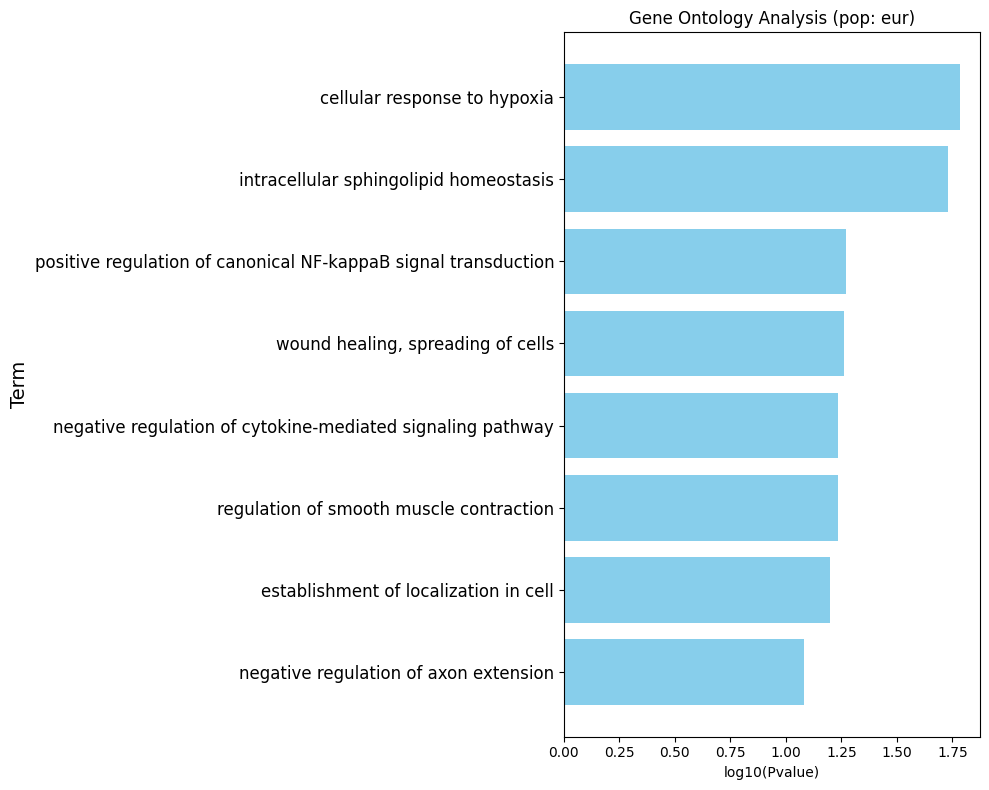

In [6]:
top_df = df_eur.sort_values(by='log10_Pvalue', ascending=False).head(15)

plt.figure(figsize=(10, 8))
plt.barh(top_df['term'], top_df['log10_Pvalue'], color='skyblue')
plt.xlabel('log10(Pvalue)')
plt.ylabel('Term', fontsize=14)
plt.title("Gene Ontology Analysis (pop: eur)")

plt.yticks(fontsize=12)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

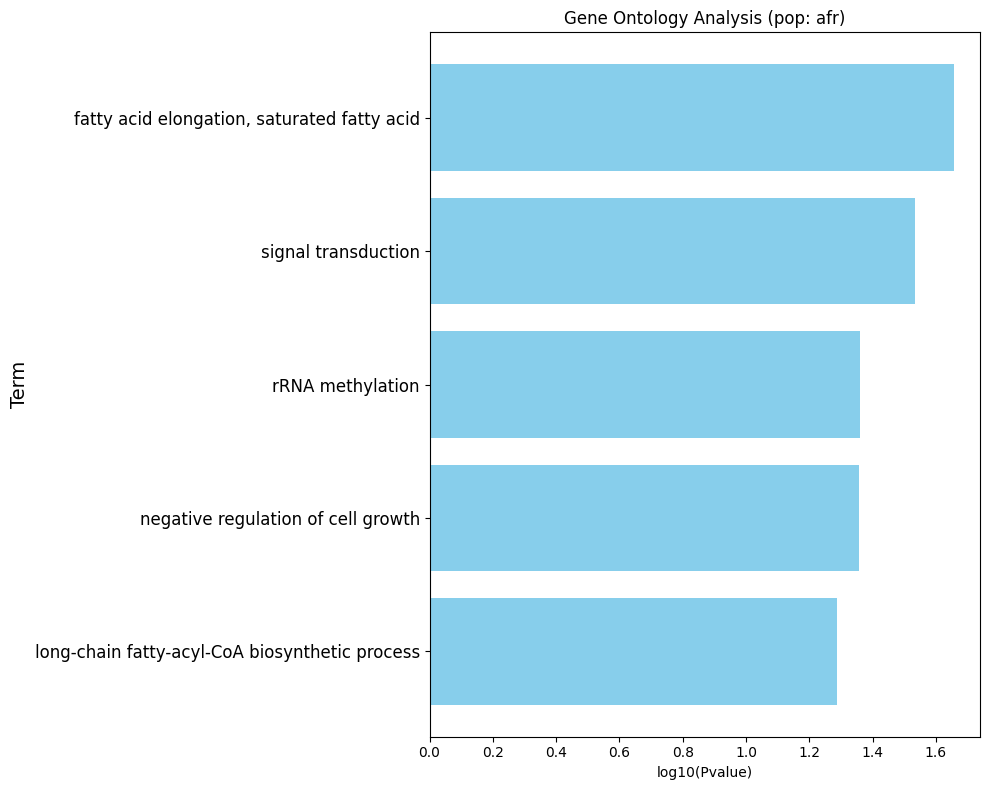

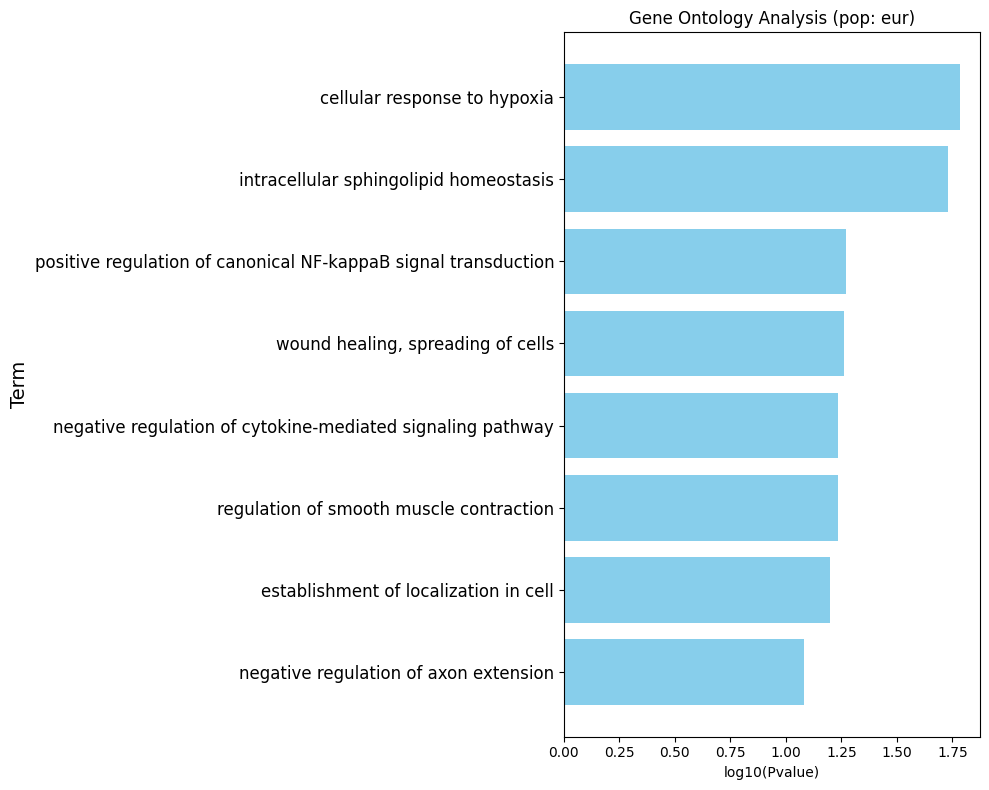

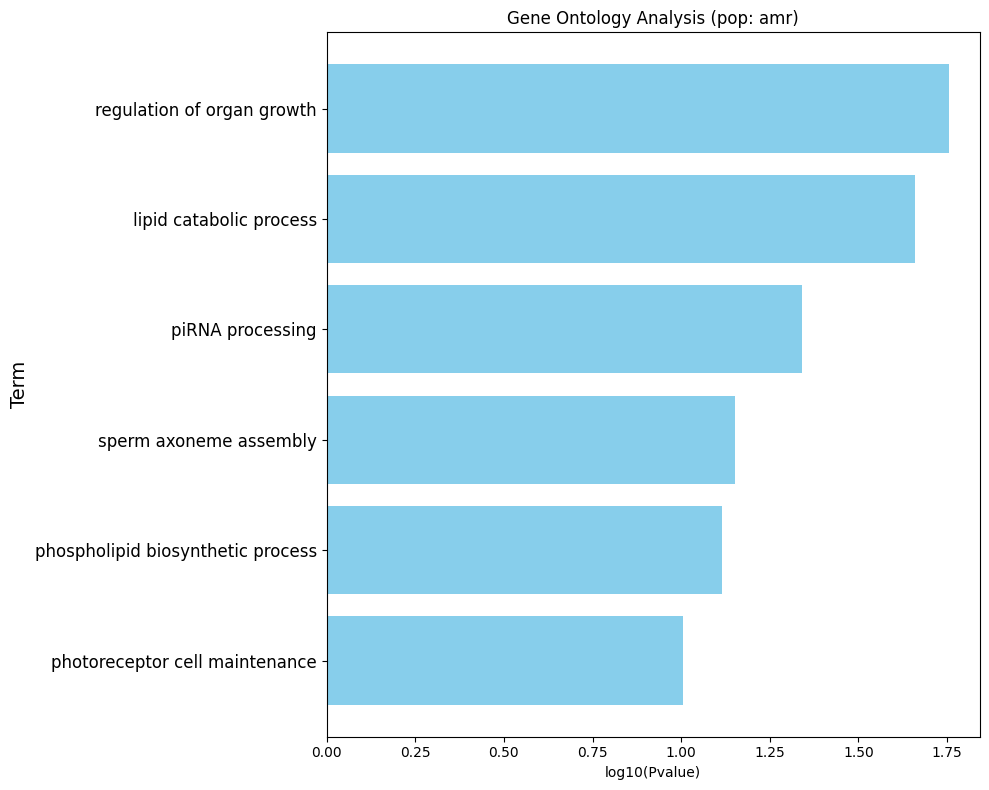

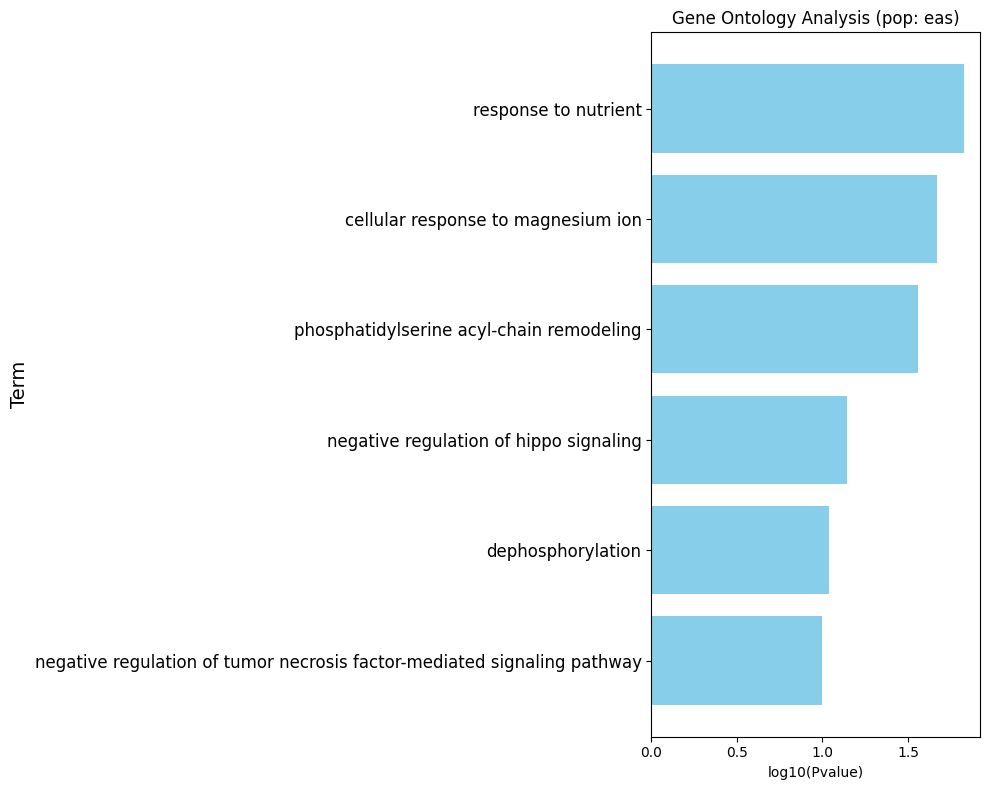

In [7]:
def plot_go_analysis(populations):

    for pop in populations:
        file_path = f"../data/GO_data/{pop}_GO_0.05.txt"
        
        df = pd.read_csv(file_path, sep='\t')
        df['log10_Pvalue'] = -np.log10(df['PValue'])
        df['term'] = df['Term'].str.split('~').str[-1]  # Extract GO term
        
        # Select top 15 terms based on P-value
        top_df = df.sort_values(by='log10_Pvalue', ascending=False).head(15)
        
        # Plot
        plt.figure(figsize=(10, 8))
        plt.barh(top_df['term'], top_df['log10_Pvalue'], color='skyblue')
        plt.xlabel('log10(Pvalue)')
        plt.ylabel('Term', fontsize=14)
        plt.title(f"Gene Ontology Analysis (pop: {pop})")
        plt.yticks(fontsize=12)
        
        # Formatting
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

plot_go_analysis(['afr', 'eur', 'amr', 'eas'])